**INTEGRANTES**

Amanda Flores Aravena

Esteban Fredes Reyes

Felipe Inostroza Ordenes

# Importanciones

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [72]:
# Dicciónario para convertir los valores a categorías
LABELS = {0: 'LowQuality', 1: 'Average', 2: 'HighQuality'}

BINS = [0, 4.5, 5.5, 10]

# Funciones

In [73]:
def cargar_datos(str):
    return pd.read_csv(str, sep=";")

In [74]:
def crear_etiquetas(df, variable_predecir):
    # Crear etiquetas para la variable a predecir (quality) en 0, 1 y 2 (low, average, high)
    return pd.cut(df[variable_predecir], bins=BINS, labels=[0, 1, 2])

# Vino Blanco

## Cargar Data

Agregar una columna que asigne el valor de calidad de los vinos. Considere que los vinos con
notas   menores   a   5   serán   catalogados   como   “LowQuality”.   Aquellos   con   nota   5   serán
catalogados   como   “Average”   y   aquellos   con   notas   mayor   a   5   serán   a   catalogados   como
“HighQuality”. 
•Considerando todos los atributos del dataset, implemente 
◦Un modelo de clasificación basado en Redes neuronales* (Tenga en cuenta que la capa de
salida debe tener un neurona por cada clase a clasificar). 
◦Un modelo de regresión basado en Redes neuronales* el cual permita estimar la calidad del
vino.
•En el entrenamiento, debe considerar la implementación de k-fold cross validation.
•Realice un análisis comparativo del error obtenido al utilizar como función de activación la
función logística (sigmoide), y la función tangente hiperbólica (tanh).

## Modelo de clasificación basado en Redes neuronales

In [75]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
import pandas as pd

### Preparacion de datos

In [76]:
# Cargar datos
white_wine = cargar_datos("Data/winequality-white.csv")

In [77]:
# Crear etiquetas
white_wine["quality"] = crear_etiquetas(white_wine, "quality")

In [78]:
# Preprocesar datos
features = white_wine.drop("quality", axis=1)
labels = white_wine["quality"]

In [79]:
import numpy as np

X = features
Y = np.ravel(labels)

In [80]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)


In [81]:
# Normalizar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# Crear modelo de red neuronal usando la funcion de activacion logistica (sigmoid)
model = models.Sequential()
model.add(layers.Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(3, activation='sigmoid'))

In [83]:
# Compilar modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
# Entrenar modelo
history = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [85]:
# Evaluar modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
46/46 [==============================] - 1s 4ms/step - loss: 0.7475 - accuracy: 0.6653
test_acc: 0.6653061509132385
test_loss: 0.7475118637084961


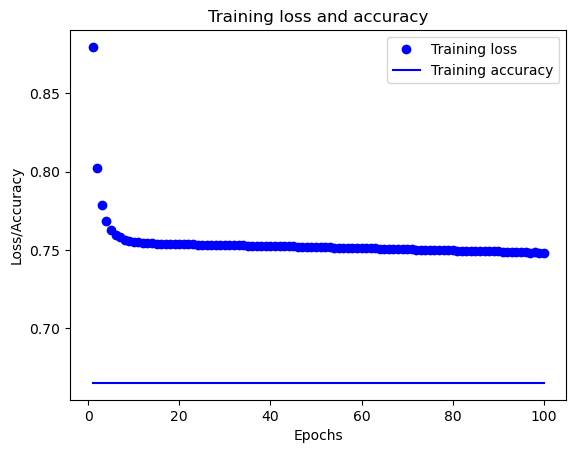

In [89]:
# Graficar resultados
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


In [86]:
# Implementar de clasificación basado en un modelo de red neuronal con 3 neuronas en la capa de salida 
